In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## One condition HDDM 
#### Load data and check data head
##### Use anxious.csv

In [3]:
# Load data from csv file into a NumPy structured array
data1CControl = hddm.load_csv('./rt_dataframes/control.csv')
data1CControl.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [5]:
data1CControl = data1CControl.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data1CControl['rt'] = data1CControl['rt']/1000
data1CControl.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,0.002238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,0.001924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,0.001415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,0.002014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,0.001082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,0.001223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,0.001115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,0.001124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,0.001712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,0.001345,0.0,102,12.0,0.0,4.0,1.0


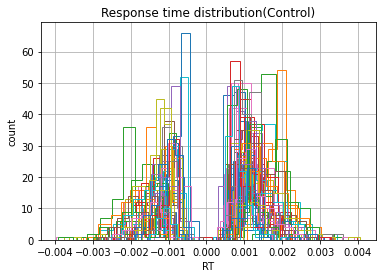

In [6]:
#flip the error RTs to be negative
data1CControl = hddm.utils.flip_errors(data1CControl)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Control)')
for i, subj_data in data1CControl.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C(seperate)/rt_distribution(Control).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [6]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(data1CControl, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM1C(seperate)/traces(1CCon).db', db='pickle')
m.save('./fitting_results/HDDM/HDDM1C(seperate)/model(1CCon)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 499.0 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


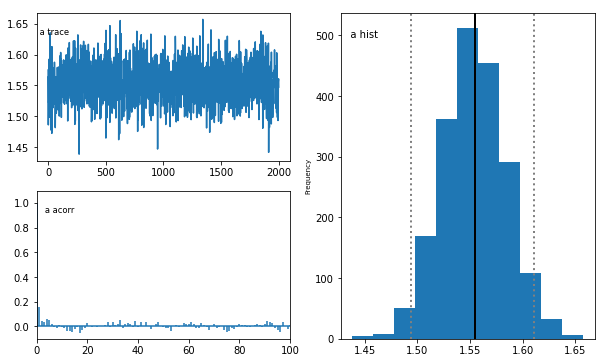

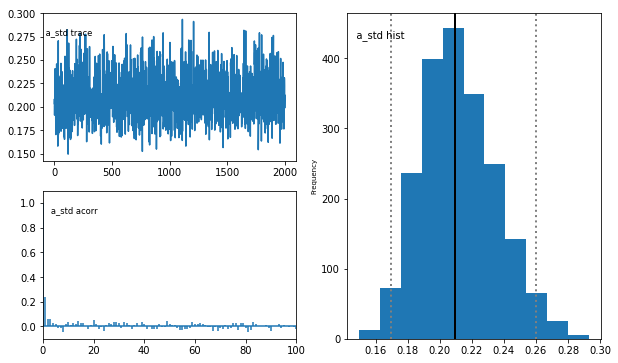

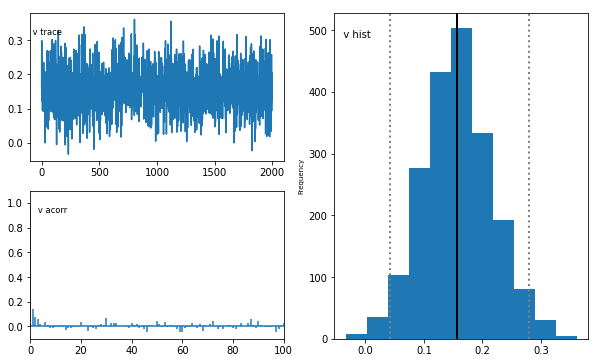

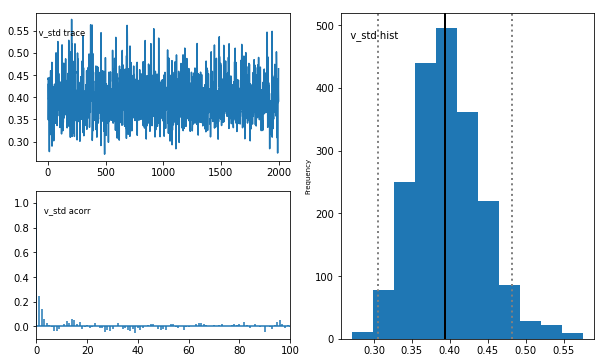

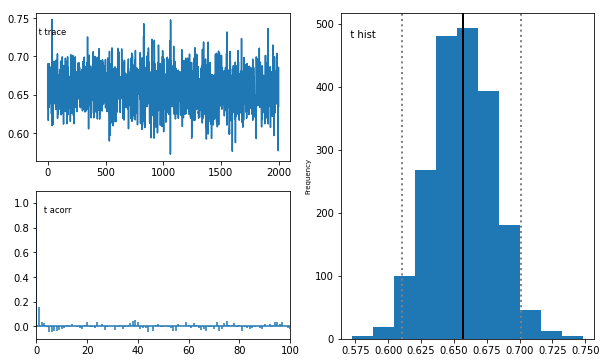

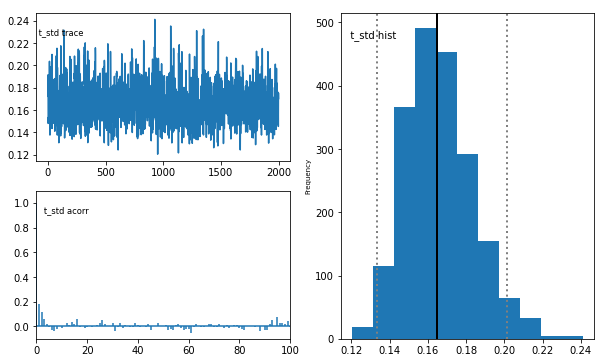

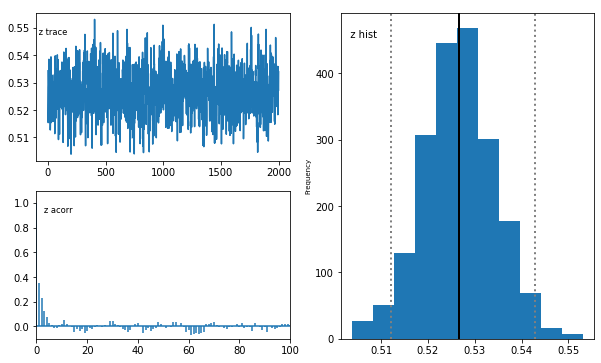

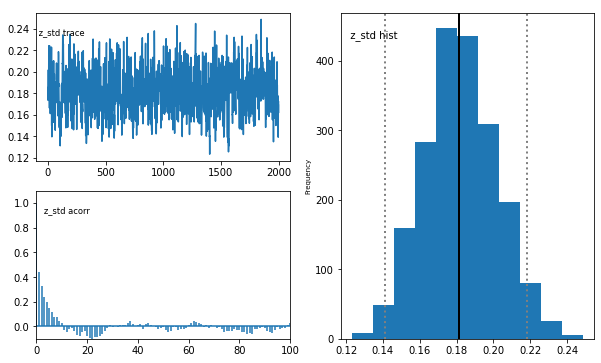

In [7]:
#plot posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [8]:
stats1CAnx = m.gen_stats()
stats1CAnx.to_csv('./fitting_results/HDDM/HDDM1C(seperate)/HDDM1CAnx(1C).csv', sep=',')
stats1CAnx[stats1CAnx.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.55419,0.0304235,1.49542,1.5339,1.55419,1.57498,1.61367,0.000851798
a_std,0.211886,0.023584,0.170626,0.194973,0.209768,0.227445,0.262382,0.000680373
v,0.157446,0.0590792,0.0403418,0.117795,0.156133,0.195646,0.278364,0.00163344
v_std,0.397646,0.0456623,0.318296,0.366439,0.393511,0.426376,0.500549,0.00139546
t,0.656964,0.0237434,0.61182,0.641532,0.656641,0.673411,0.703006,0.000526621
t_std,0.166239,0.0176243,0.136906,0.15341,0.164757,0.177074,0.206466,0.000470103
z,0.526661,0.00774234,0.511119,0.521665,0.526696,0.531785,0.542232,0.000279996
z_std,0.182335,0.0199201,0.145017,0.168991,0.181527,0.19605,0.223445,0.000862997


In [9]:
m.dic

15588.605656207506

## Check for Model convergence

In [10]:
# Set up models list to append results
models = list()

In [11]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM1C(seperate)/chain_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM1C(seperate)/chain1CCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [12]:
num_chains = 5
data_chains = [(data1CControl,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 1Fitting chain 0Fitting chain 2Fitting chain 3



Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 ------           17%                  ] 520 of 3000 complete in 87.5 sec                 0%                  ] 5 of 3000 complete in 0.7 sec  [                  0%                  ] 5 of 3000 complete in 0.7 sec[                  0%                  ] 5 of 3000 complete in 0.7 sec[                  0%                  ] 5 of 3000 complete in 0.7 sec [                  0%                  ] 8 of 3000 complete in 1.2 sec[                  0%                  ] 8 of 3000 complete in 1.2 sec[                  0%                  ] 9 of 3000 complete in 1.3 sec[                  0%                  ] 9 of 3000 complete in 1.3 sec[                  0%                  ] 12 of 3000 complete in 1.8 sec[                  0%                  ] 12 of 3000 complete in 1.8 sec[                  0%                  ] 12 of 3000 complete in 1.8 sec[                  0%                  ] 13 of 3000 complete in 2.0 sec[                  0%                  ] 13 of 3000 complete in 2.0 sec[          

In [ ]:
models

In [ ]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

In [ ]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

In [ ]:
m.plot_posterior_predictive(figsize=(50, 70))